# Library yang digunakan

In [305]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns  
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis

# Menampilkan Data

In [306]:
df= pd.read_csv('Dr.-Fahrul-Agus,MT_Dr.-Fahrul-Agus,MT_StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Jenis/type data dari setiap variable

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Buat Tabel Distribusi Frekuensi dan Histogram Variabel reading_score dan writing_score dengan jumlah dan lebar interval sebesar 10

## Tabel Distribusi Frekuensi

In [308]:
# reading_score
inter = pd.interval_range(0,100 , freq = 10)
freq_table = pd.cut(df ['reading_score'],inter)
freq_table.value_counts(sort=False).rename_axis('reading_score').reset_index(name='frequency')

,reading_score,frequency
0,"(0, 10]",0
1,"(10, 20]",1
2,"(20, 30]",7
3,"(30, 40]",19
4,"(40, 50]",70
5,"(50, 60]",178
6,"(60, 70]",238
7,"(70, 80]",252
8,"(80, 90]",173
9,"(90, 100]",62


In [309]:
# writing_score
inter = pd.interval_range(0,100 , freq = 10)
freq_table = pd.cut(df ['writing_score'],inter)
freq_table.value_counts(sort=False).rename_axis('writing_score').reset_index(name='frequency')

,writing_score,frequency
0,"(0, 10]",1
1,"(10, 20]",2
2,"(20, 30]",7
3,"(30, 40]",25
4,"(40, 50]",89
5,"(50, 60]",177
6,"(60, 70]",243
7,"(70, 80]",248
8,"(80, 90]",140
9,"(90, 100]",68


## Histogram

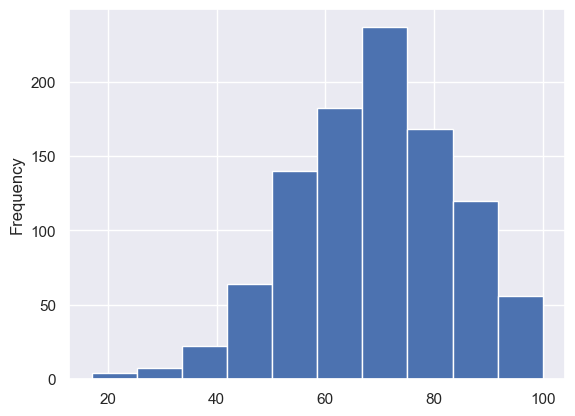

In [310]:
# reading_score
plt.figure();
df['reading_score'].plot.hist();

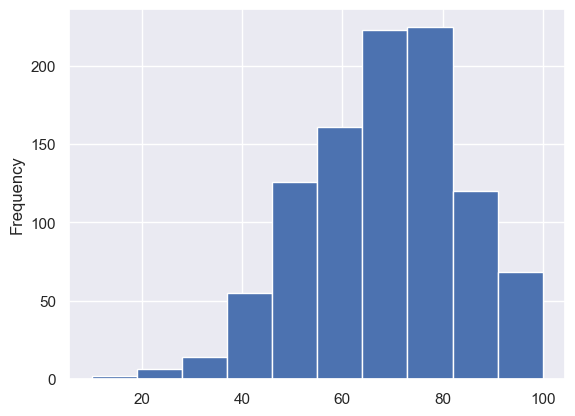

In [311]:
# writing_score
plt.figure();
df['writing_score'].plot.hist();

# Tentukan nilai Tendensi Central: Rata-rata, Median, Modus, Min dan Max data kedua variable tersebut.

In [312]:
# Setup menampilkan modus
def nilaiModus(angka):
    nilaiModus = [0, 0]
    for i in angka:
        frekuensi = angka.count(i)
        if(frekuensi>=nilaiModus[1]):
           nilaiModus = [i, frekuensi]
    return nilaiModus[0]

In [313]:
# reading_score
rata2  = df['reading_score'].mean()
median = df['reading_score'].median()
modus  = nilaiModus(df['reading_score'].tolist())
minimal    = df['reading_score'].min()
maximal    = df['reading_score'].max()

print (f'''reading_score :
Rata-rata = {rata2}
Median    = {median}
Modus     = {modus}
Min       = {minimal}
Max       = {maximal}''')

reading_score :
Rata-rata = 69.169
Median    = 70.0
Modus     = 72
Min       = 17
Max       = 100


In [314]:
# writing_score
rata2  = df['writing_score'].mean()
median = df['writing_score'].median()
modus  = nilaiModus(df['writing_score'].tolist())
minimal    = df['writing_score'].min()
maximal    = df['writing_score'].max()

print (f'''reading_score :
Rata-rata = {rata2}
Median    = {median}
Modus     = {modus}
Min       = {minimal}
Max       = {maximal}''')

reading_score :
Rata-rata = 68.054
Median    = 69.0
Modus     = 74
Min       = 10
Max       = 100


# Tentukan nilai Variasi: Jangkauan Range, Kisaran Interkuartil, Varians, Standar Deviasi data reading_score dan writing_score.

In [315]:
# reading_score
Range = df['reading_score'].max() - df['reading_score'].min()
Q1 = df['reading_score'].quantile(0.25)
Q2 = df['reading_score'].quantile(0.50)
Q3 = df['reading_score'].quantile(0.75)
var = df['reading_score'].var()
std = df['reading_score'].std()

print (f'''writing_score:
Range   = {Range}
Q1      = {Q1}
Q2      = {Q2}
Q3      = {Q3}
Varians = {var}
Standar Devisiasi = {std}''')

writing_score:
Range   = 83
Q1      = 59.0
Q2      = 70.0
Q3      = 79.0
Varians = 213.16560460460462
Standar Devisiasi = 14.600191937252216


In [316]:
# writing_score
Range = df['writing_score'].max() - df['writing_score'].min()
Q1 = df['writing_score'].quantile(0.25)
Q2 = df['writing_score'].quantile(0.50)
Q3 = df['writing_score'].quantile(0.75)
var = df['writing_score'].var()
std = df['writing_score'].std()

print (f'''writing_score:
Range   = {Range}
Q1      = {Q1}
Q2      = {Q2}
Q3      = {Q3}
Varians = {var}
Standar Devisiasi = {std}''')

writing_score:
Range   = 90
Q1      = 57.75
Q2      = 69.0
Q3      = 79.0
Varians = 230.907991991992
Standar Devisiasi = 15.19565701086965


# Buat Grafik data Variabel reading_score dan writing_score: Histogram, BOX PLOT, dan Tentukan Nilai Skewness dan Kurtosis. Buat interpretasi saudara tentang perbedaan distribusi kedua variable tersebut, terutama pada gambar BOX PLOT dan nilai Skewness - Kurtosisnya.

## Histogram

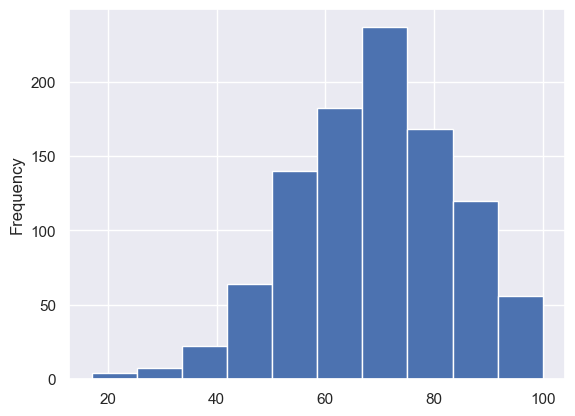

In [317]:
# histogram Reading_Score
plt.figure();
df['reading_score'].plot.hist();

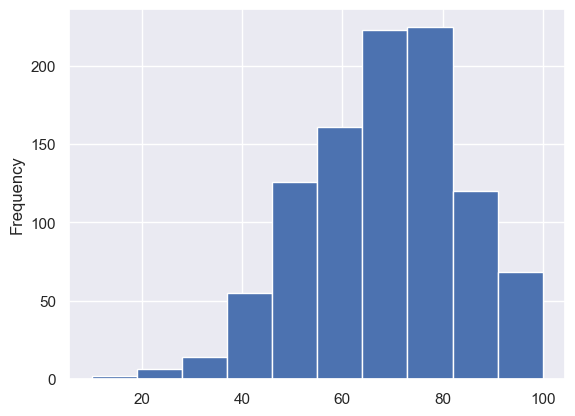

In [318]:
# writing_score
plt.figure();
df['writing_score'].plot.hist();

## Boxplot

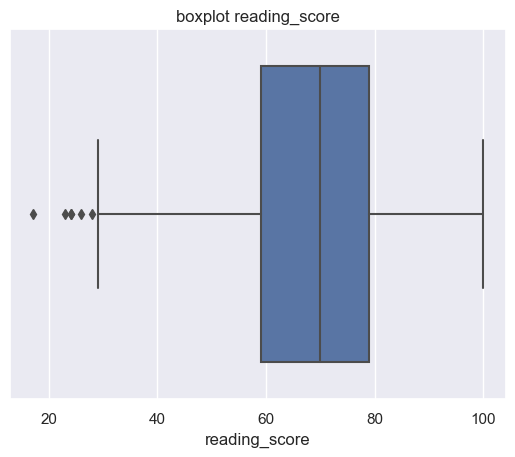

In [319]:
# boxplot reading_score
plt.title('boxplot reading_score')
sns.boxplot(data=df,x='reading_score')
plt.show()

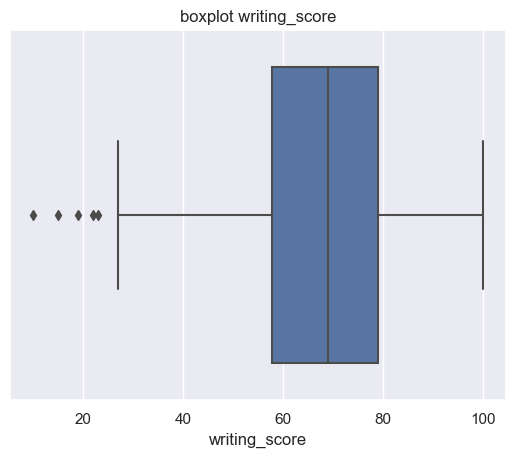

In [320]:
# boxplot reading_score
plt.title('boxplot writing_score')
sns.boxplot(data=df,x='writing_score')
plt.show()

## Skewness

In [332]:
print('reading_score : ')
print(skew(df['reading_score'], axis=0, bias=True))
print('writing_score :')
print(skew(df['writing_score'], axis=0, bias=True))

reading_score : 
-0.25871569927829347
writing_score :
-0.28900962452114176


## Kurtosis

In [330]:
print('reading_score : ')
print(kurtosis(df['reading_score'], axis=0, bias=True))
print('writing_score :')
print(kurtosis(df['writing_score'], axis=0, bias=True))

reading_score : 
-0.07391861478331307
writing_score :
-0.03919203131162252


# Buat scater plot antara writing_score (dependent variable-Y) versus reading_score (independent variable-X). Tulis interpretasi saudara apakah ada indikasi hubungan liear antar keduanya.

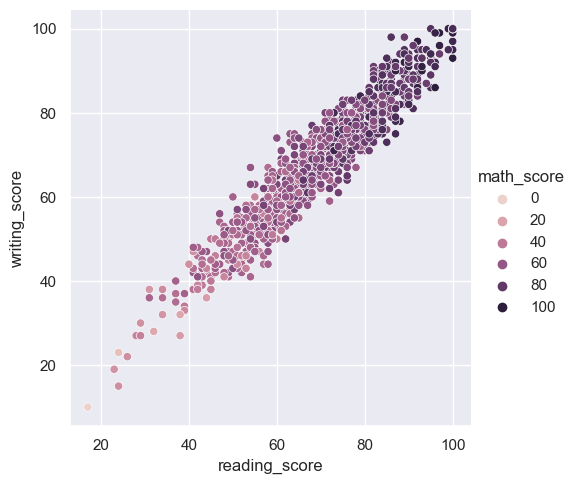

In [333]:
# set grid style
sns.set(style ='darkgrid')
sns.relplot(x ='reading_score', y ='writing_score', hue ='math_score', data = df);